In [42]:
import numpy as np
import serpentTools as st
from utilitities import*
from numpy.linalg import norm
import matplotlib.image as mpimg

In [43]:
coreresFile = '/Users/isaacnaupaaguirre/Downloads/s82d_ac_c3_gcu_coreres.main_res.m'
coreres = st.read(coreresFile)

ringresFile = '/Users/isaacnaupaaguirre/Downloads/s82d_ac_c3_gcu_ringres.main_res.m'
ringres = st.read(ringresFile)

elemresFile = '/Users/isaacnaupaaguirre/Downloads/s82d_ac_c3_gcu_elemres.main_res.m'
elemres = st.read(elemresFile)

SERPENT Serpent 2.2.1 found in /Users/isaacnaupaaguirre/Downloads/s82d_ac_c3_gcu_coreres.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.2.1 found in /Users/isaacnaupaaguirre/Downloads/s82d_ac_c3_gcu_ringres.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.2.1 found in /Users/isaacnaupaaguirre/Downloads/s82d_ac_c3_gcu_elemres.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


In [44]:
ref2DFile = '/Users/isaacnaupaaguirre/Downloads/s82d_c3_18G_default70_1.main_res.m'
ref2Dres = st.read(ref2DFile)

SERPENT Serpent 2.1.32 found in /Users/isaacnaupaaguirre/Downloads/s82d_c3_18G_default70_1.main_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


### System Analysis

In [45]:
coreUni = coreres.universes['100', 0, 0, 0]
rootUni = coreres.universes['0', 0, 0, 0]

In [46]:
# rootUni.infExp.keys()

In [47]:
# ax = rootUni.plot('infTot', labels=['infAbs - system'])
# ax.grid()
# coreUni.plot('infTot', ax=ax, labels = ['infAbs - core'], legend='right')

In [48]:
def condense(universe, key, useInvFlux = False):
    cond = None
    if useInvFlux:
        invFlux = np.zeros(len(universe.infExp[key]))
        for i in range(0, len(invFlux)):
            invFlux[i] = 1/universe.infExp[key][i]
        cond = np.sum(np.multiply(universe.infExp[key], invFlux)/np.sum(invFlux))
    else:
        cond = np.sum(np.multiply(universe.infExp[key], universe.infExp['infFlx']))/np.sum(universe.infExp['infFlx'])
    return cond

In [49]:
fluxweight_coreTranspxs = condense(coreUni, 'infTranspxs')
invfluxweight_coreTranspxs = condense(coreUni, 'infTranspxs', useInvFlux=True)

fluxweight_coreDiff = 1/(3*fluxweight_coreTranspxs)
invfluxweight_coreDiff = 1/(3*invfluxweight_coreTranspxs)

print("fluxweighted infTranspxs : {:.3f}".format(fluxweight_coreTranspxs))
print("invfluxweighted infTranspxs : {:.3f}".format(invfluxweight_coreTranspxs))

print("fluxweighted infDiff : {:.3f}".format(fluxweight_coreDiff))
print("invfluxweighted infDiff : {:.3f}".format(invfluxweight_coreDiff))

coreAbs = condense(coreUni, 'infAbs')

fluxweight_coreDiffLen = np.sqrt(fluxweight_coreDiff/coreAbs)
invfluxweight_coreDiffLen = np.sqrt(invfluxweight_coreDiff/coreAbs)

print("fluxweighted infDiffLen : {:.3f}".format(fluxweight_coreDiffLen))
print("invfluxweighted infDiffLen : {:.3f}".format(invfluxweight_coreDiffLen))  

fluxweighted infTranspxs : 0.487
invfluxweighted infTranspxs : 0.358
fluxweighted infDiff : 0.684
invfluxweighted infDiff : 0.932
fluxweighted infDiffLen : 4.287
invfluxweighted infDiffLen : 5.002


### Radial GCU Resolution Study 2D

####  Make Sure Cases are unbiased torwards statistics on few-group data

In [50]:
maxs = []
max = None
for uni in coreres.universes:
    maxs.append(np.max(coreres.universes[uni].infUnc['infTot']))
print(np.max(maxs))

0.00327


In [51]:
maxs = []
max = None
for uni in ringres.universes:
    maxs.append(np.max(ringres.universes[uni].infUnc['infTot']))
print(np.max(maxs))

0.00685


In [52]:
maxs = []
max = None
for uni in elemres.universes:
    maxs.append(np.max(elemres.universes[uni].infUnc['infTot']))
print(np.max(maxs))

0.00895


#### Keff Comparison

In [53]:
reffKeff = elemres.resdata['absKeff']
print("Reference Serpent Keff: {:.5}, pcm: {}".format(reffKeff[0],reffKeff[1]*1e5))

Reference Serpent Keff: 1.142, pcm: 4.6


In [54]:
ringResDF = postProcess('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_ringres_out.csv', isSteady=True)
coreResDF = postProcess('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_coreres_out.csv', isSteady=True)
elemResDF = postProcess('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_elemres_out.csv', isSteady=True)

In [55]:
def kToPCM(k):
    return 1e5*((k-1)/k)

In [56]:
griff_ckeff = coreResDF['eigenvalue'][1]
griff_rkeff = ringResDF['eigenvalue'][1]
griff_ekeff = elemResDF['eigenvalue'][1]

print("core resolution keff: {:.5f}, pcmDiff: {:.1f}".format(griff_ckeff, kToPCM(griff_ckeff) - kToPCM(reffKeff[0])))
print("ring resolution keff: {:.5f}, pcmDiff: {:.1f}".format(griff_rkeff, kToPCM(griff_rkeff) - kToPCM(reffKeff[0])))
print("elem resolution keff: {:.5f}, pcmDiff: {:.1f}".format(griff_ekeff, kToPCM(griff_ekeff) - kToPCM(reffKeff[0])))

core resolution keff: 1.14162, pcmDiff: -25.8
ring resolution keff: 1.14170, pcmDiff: -20.1
elem resolution keff: 1.14175, pcmDiff: -15.8


1. PCM difference decreases with increase in spatial resolution as espected

#### Verification of Few Group Spectrum

In [57]:
fgs_hr18 = [5.0000E-09, 2.5000E-08, 1.0000E-07, 4.0000E-07, 9.9600E-07, 3.0000E-06,
9.8770E-06, 2.7700E-05, 1.0000E-04, 5.5000E-04, 3.0000E-03, 1.5030E-02,
1.0000E-01, 4.0000E-01, 8.2100E-01, 1.3530E+00, 3.0000E+00, 6.0655E+00,
2.0000E+01]

In [58]:
refFGSFile = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_coreres.main_det0.m'
refFGSDet = st.read(refFGSFile)
refFGS = refFGSDet['fgs_spec']

In [59]:
def normZeroToOne(arr):
    normArr = np.zeros(len(arr))
    min = np.min(arr)
    max = np.max(arr)
    for i in range(0, len(arr)):
        normArr[i] = (arr[i] - min)/(max - min)
    return normArr

<AxesSubplot:xlabel='Energy [MeV]', ylabel='Tally data normalized per unit lethargy $\\pm3\\sigma$'>

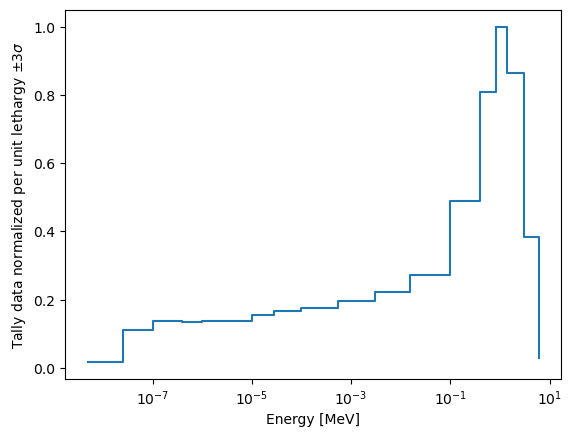

In [60]:
refFGS.spectrumPlot()

In [61]:
normRefFGS = normZeroToOne(refFGS.tallies)

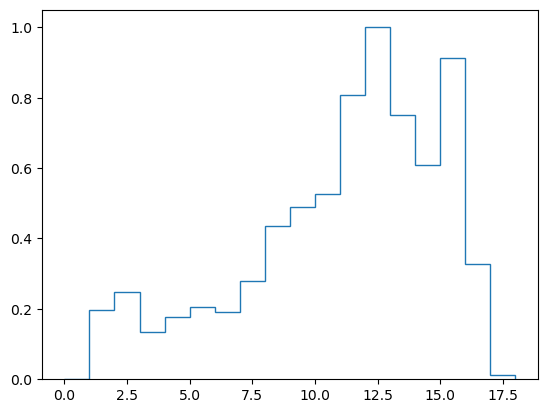

In [62]:
plt.stairs(normRefFGS)

In [63]:
#collectFGS
nFewGroups = 18
griff_coreResFGS = []
griff_ringResFGS = []
griff_elemResFGS = []
for i in range(nFewGroups-1, -1, -1):
    griff_coreResFGS.append(coreResDF['Flux{}'.format(i+1)][1])
    griff_ringResFGS.append(ringResDF['Flux{}'.format(i+1)][1])
    griff_elemResFGS.append(elemResDF['Flux{}'.format(i+1)][1])

normGriff_ringResFGS = normZeroToOne(griff_ringResFGS)
normGriff_coreResFGS = normZeroToOne(griff_coreResFGS)
normGriff_elemResFGS = normZeroToOne(griff_elemResFGS)

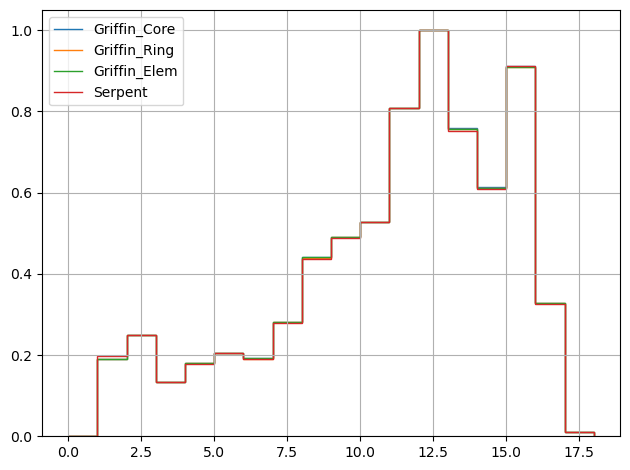

In [64]:
plt.stairs(normGriff_coreResFGS, label = "Griffin_Core")
plt.stairs(normGriff_ringResFGS, label = "Griffin_Ring")
plt.stairs(normGriff_elemResFGS, label = "Griffin_Elem")
plt.stairs(normRefFGS, label = "Serpent")
plt.legend(loc='upper left')
plt.tight_layout()
plt.grid()

In [65]:
def calcL2NormDiffPerc(ref,  comp):
    diff = np.subtract(ref, comp)
    diffNorm  = norm(diff)
    base = norm(ref)
    return (diffNorm/base)*100

def calcPercentRelativeError(ref, comp):
    relErr = []
    diff = np.abs(np.subtract(ref, comp))

    for i in range(0, len(diff)):
        if diff[i] != 0:
            #relErr.append(2*(diff[i]/(np.abs(ref[i])+np.abs(comp[i]))))
            relErr.append(100*diff[i]/ref[i])
        else:
            relErr.append(0)
    return relErr

In [66]:
coreL2NormDiffFGS = calcL2NormDiffPerc(normRefFGS, normGriff_coreResFGS)
ringL2NormDiffFGS = calcL2NormDiffPerc(normRefFGS, normGriff_ringResFGS)
elemL2NormDiffFGS = calcL2NormDiffPerc(normRefFGS, normGriff_elemResFGS)

In [67]:
print("core resolution FGS l2normDiff (%): {:.3f}".format(coreL2NormDiffFGS))
print("ring resolution FGS l2normDiff (%): {:.3f}".format(ringL2NormDiffFGS))
print("elem resolution FGS l2normDiff (%): {:.3f}".format(elemL2NormDiffFGS))

core resolution FGS l2normDiff (%): 0.624
ring resolution FGS l2normDiff (%): 0.607
elem resolution FGS l2normDiff (%): 0.609


In [68]:
def createDetectors(unis):
    detStr = ""
    for i in range(0, len(unis)):
        detStr = detStr + 'det nuFissRate{} dr -7 void du {}\n'.format(unis[i], unis[i])
        detStr = detStr + 'det capRate{} dr -2 void du {}\n'.format(unis[i], unis[i])

    return detStr

#### Flux Map Comparison

In [69]:
coreRefMapFile = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_coreres.main_detMap.m'
coreRefMapDet = st.read(coreRefMapFile, reader='det')

ringRefMapFile = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_ringres.main_det0.m'
ringRefMapDet = st.read(ringRefMapFile, reader='det')

elemRefMapFile = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_elemres.main_det0.m'
elemRefMapDet = st.read(elemRefMapFile, reader='det')

In [70]:
def griffinFluxMapReader(path):
    keys = ['volume', 'nufiss', 'power', 'absorption', 'scalar']
    block = []
    vol = []
    nufiss = []
    pow = []
    abs = []
    scalar = []
    with open(path, "r") as f:
        lines = f.readlines()
        f.close()

    bidx = None
    eidx = None
    hasBegun = False
    for ldx, line in enumerate(lines):
        if "Block average" in line:
            bidx = ldx+2
            hasBegun = True 
        if (line == "\n") & hasBegun:
            eidx = ldx
            break
    
    data = lines[bidx:eidx]

    dicts = []

    for i in range(0, len(data)):
        vals  = data[i].split()
        block.append(vals[0])
        vol.append(float(vals[1]))
        nufiss.append(float(vals[2]))
        pow.append(float(vals[3]))
        abs.append(float(vals[4]))
        scalar.append(float(vals[5]))

        dset = [vol[i], nufiss[i], pow[i], abs[i], scalar[i]]
        dicts.append(dict(zip(keys, dset)))


    map = dict(zip(block, dicts))
    return map

In [71]:
coreGriffBlockMap = griffinFluxMapReader('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/core_flux_map.txt')
ringGriffBlockMap = griffinFluxMapReader('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/ring_flux_map.txt')
elemGriffBlockMap = griffinFluxMapReader('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/elem_flux_map.txt')

In [72]:
def getBlock2UniMap(df, blockMap):
    uniMap = {}
    blocks = list(df['Block Name'])
    unis = list(df['material_id'])

    bkeyu = {}

    for bdx, block in enumerate(blocks):
        bkeyu[block.replace("block_", "")] = str(int(unis[bdx]))

    for block in blockMap:
        uniMap[bkeyu[block]] = blockMap[block]
    
    return uniMap

In [86]:
def getUni2BlockMap(df, uniMap):
    blockMap = {}

    blocks = list(df['Block Name'])
    unis = list(df['material_id'])

    ukeyb = {}

    for bdx, block in enumerate(blocks):
        ukeyb[str(int(unis[bdx]))] = block.replace("block_", "")

    for uni in uniMap:
        # uniMap[bkeyu[block]] = blockMap[block]

        blockMap[ukeyb[uni]] = uniMap[str(uni)]
    return blockMap

In [74]:
corePointData = pd.read_csv('snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_coreres_cellPointdata.csv')
ringPointData = pd.read_csv('snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_ringres_cellPointdata.csv')
elemPointData = pd.read_csv('snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_elemres_cellPointdata.csv')

In [75]:
coreGriffMap = getBlock2UniMap(corePointData, coreGriffBlockMap)
ringGriffMap = getBlock2UniMap(ringPointData, ringGriffBlockMap)
elemGriffMap = getBlock2UniMap(elemPointData, elemGriffBlockMap)

In [76]:
# print(coreGriffMap)
# print(ringGriffMap)
# print(elemGriffMap)

In [77]:
coreUnis = list(coreGriffMap.keys())
ringUnis = list(ringGriffMap.keys())
elemUnis = list(elemGriffMap.keys())

# print(createDetectors(coreUnis))
# print(createDetectors(ringUnis))
# print(createDetectors(elemUnis))

In [78]:
def getUniValsList(map, attr):
    vals = []
    for uni in map:
        vals.append(map[uni][attr])
    return vals

In [79]:
coreNuFissMap = {}
coreCapMap = {}

coreNuFiss = []
coreCap = []

ringNuFissMap = {}
ringCapMap = {}

ringNuFiss = []
ringCap = []

elemNuFissMap = {}
elemCapMap = {}

elemNuFiss = []
elemCap = []

for uni in coreUnis:
    coreNuFissMap[uni] = coreRefMapDet["nuFissRate{}".format(uni)]
    coreCapMap[uni] = coreRefMapDet["capRate{}".format(uni)]

for uni in ringUnis:
    ringNuFissMap[uni] = ringRefMapDet["nuFissRate{}".format(uni)]
    ringCapMap[uni] = ringRefMapDet["capRate{}".format(uni)]

for uni in elemUnis:
    elemNuFissMap[uni] = elemRefMapDet["nuFissRate{}".format(uni)]
    elemCapMap[uni] = elemRefMapDet["capRate{}".format(uni)]

In [80]:
for uni in coreNuFissMap:
    coreNuFiss.append(coreNuFissMap[uni].tallies/coreGriffMap[uni]['volume'])
    coreCap.append(coreCapMap[uni].tallies/coreGriffMap[uni]['volume'])

for uni in ringNuFissMap:
    ringNuFiss.append(ringNuFissMap[uni].tallies/ringGriffMap[uni]['volume'])
    ringCap.append(ringCapMap[uni].tallies/ringGriffMap[uni]['volume'])

for uni in elemNuFissMap:
    elemNuFiss.append(elemNuFissMap[uni].tallies/elemGriffMap[uni]['volume'])
    elemCap.append(elemCapMap[uni].tallies/elemGriffMap[uni]['volume'])

In [87]:
elemNuFissBlockMap = getUni2BlockMap(elemPointData, elemNuFissMap)

In [43]:
griffCoreNuFiss = getUniValsList(coreGriffMap, 'nufiss')
griffRingNuFiss = getUniValsList(ringGriffMap, 'nufiss')
griffElemNuFiss = getUniValsList(elemGriffMap, 'nufiss')

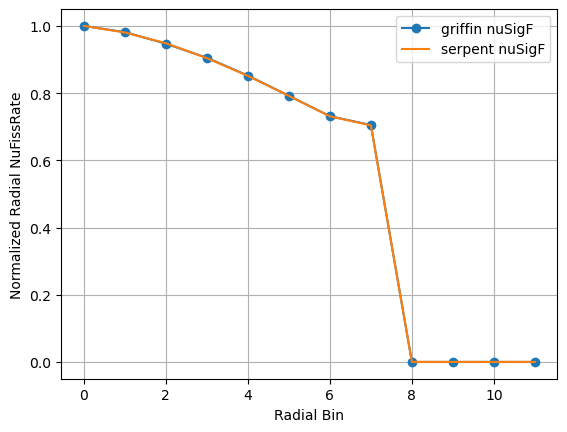

In [44]:
plt.plot(normZeroToOne(griffRingNuFiss), label = "griffin nuSigF", marker = "o")
plt.plot(normZeroToOne(ringNuFiss), label = "serpent nuSigF")
plt.ylabel("Normalized Radial NuFissRate")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid()

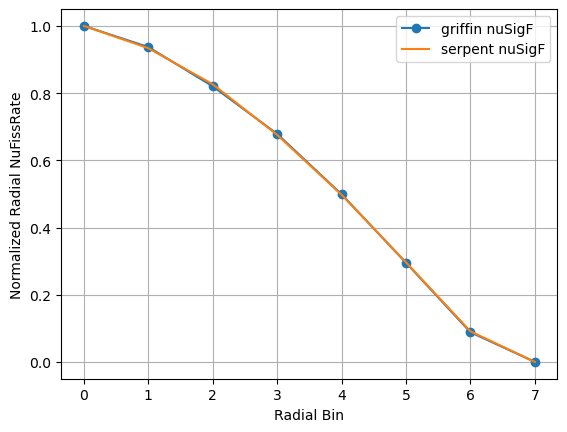

In [45]:
plt.plot(normZeroToOne(griffRingNuFiss[0:8]), label = "griffin nuSigF", marker = "o")
plt.plot(normZeroToOne(ringNuFiss[0:8]), label = "serpent nuSigF")
plt.ylabel("Normalized Radial NuFissRate")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid()

In [46]:
ringL2NormDiffNuFiss = calcL2NormDiffPerc(normZeroToOne(ringNuFiss), normZeroToOne(griffRingNuFiss))
print("ring resolution NuFissRate l2normDiff (%): {:.3f}".format(ringL2NormDiffNuFiss))

ring resolution NuFissRate l2normDiff (%): 0.112


In [47]:
coreNuFissRateRelError = calcPercentRelativeError(normZeroToOne(coreNuFiss), normZeroToOne(griffCoreNuFiss))
coreNuFissRateRelErrorMap = dict(zip(coreUnis, coreNuFissRateRelError))

ringNuFissRateRelError = calcPercentRelativeError(normZeroToOne(ringNuFiss), normZeroToOne(griffRingNuFiss))
ringNuFissRateRelErrorMap = dict(zip(ringUnis, ringNuFissRateRelError))

elemNuFissRateRelError = calcPercentRelativeError(normZeroToOne(elemNuFiss), normZeroToOne(griffElemNuFiss))
elemNuFissRateRelErrorMap = dict(zip(elemUnis, elemNuFissRateRelError))

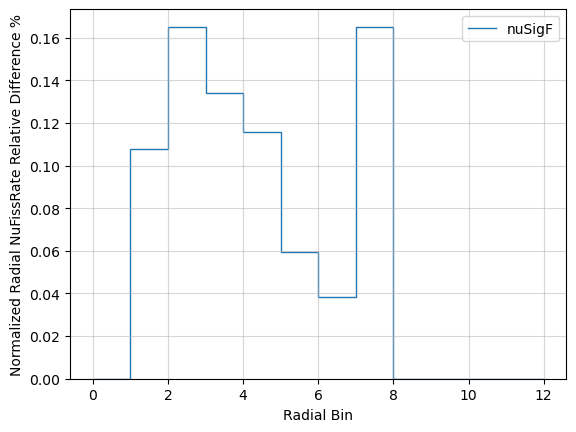

In [48]:
plt.stairs(ringNuFissRateRelError , label = "nuSigF", alpha = 1)
plt.ylabel("Normalized Radial NuFissRate Relative Difference %")
plt.xlabel("Radial Bin")
plt.legend()
plt.grid(alpha = 0.5)

In [99]:
def createAppendCSV(cellData, keys, params, vals, exportPath, useBlockId = False):
    xyz = ['x', 'y', 'z']

    for param in params:
        xyz.append(param)

    appendDF = pd.DataFrame(columns=xyz)

    map = {}

    for key in keys:
        for pdx, param in enumerate(params):
            map[key] = {}
            
    for kdx, key in enumerate(keys):
        for pdx, param in enumerate(params):
            map[key][param] = vals[pdx][kdx]

    
    if not useBlockId:
        pointKeys = np.array(list(cellData['material_id'])).astype('int')
    else:
        pointKeys = []
        blocks = list(cellData['Block Name'])
        for i in range(0, len(blocks)):
            pointKeys.append(int(blocks[i].replace("block_", "")))

    appendDF['x'] = list(cellData['Points_0'])
    appendDF['y'] = list(cellData['Points_1'])
    appendDF['z'] = list(cellData['Points_2'])

    for param in params:
        pointData = []
        for i in range(0, len(pointKeys)):
            pointData.append(map[str(pointKeys[i])][param])
        
        appendDF[param] = pointData

    appendDF.to_csv(exportPath, index=False)
    
    return appendDF

In [100]:
coreParams = ['nuFissRate', 'nuFissRateRelError']
coreVals = [getUniValsList(coreGriffMap, 'nufiss'), coreNuFissRateRelError]
corePath = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_coreres_cellPointdataAppend.csv'

ringParams = ['nuFissRate', 'nuFissRateRelError']
ringVals = [getUniValsList(ringGriffMap, 'nufiss'), ringNuFissRateRelError]
ringPath = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_ringres_cellPointdataAppend.csv'

elemParams = ['nuFissRate', 'nuFissRateRelError']
elemVals = [getUniValsList(elemGriffMap, 'nufiss'), elemNuFissRateRelError]
elemPath = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_elemres_cellPointdataAppend.csv'

createAppendCSV(corePointData, coreUnis, coreParams, coreVals, corePath)
createAppendCSV(ringPointData, ringUnis, ringParams, ringVals, ringPath)
createAppendCSV(elemPointData, elemUnis, elemParams, elemVals, elemPath);

NameError: name 'coreNuFissRateRelError' is not defined

#### Element Based Flux Map
![alt text](elem_flux.png "Title")

#### Element Based - Elem XS Flux Rel Error Map
![alt text](elem_flux_relerr.png "Title")

#### Element Based - Ring XS Flux Rel Error Map
![alt text](elem_ringxs_flux_relerr.png "Title")

#### Element Based - Core XS Flux Rel Error Map
![alt text](elem_corexs_flux_relerr.png "Title")

In [101]:
# gen fuelmat if for elem-based mesh using core based xs
elemMatId =  '20000 30000 40000 50000 60000 70000 80000 100000 110000 120000 130000 140000 150000 160000 170000 180000 190000 200000 210000 220000 230000 240000 250000 260000 270000 280000 290000 300000 310000 320000 330000 340000 350000 360000 370000 380000 390000 400000 410000 420000 430000 440000 450000 460000 470000 480000 490000 500000 510000 520000 530000 540000 550000 560000 570000 580000 590000 600000 610000 620000 630000 640000 650000 660000 670000 680000 690000 700000 710000 720000 730000 740000 750000 760000 770000 780000 790000 800000 810000 820000 830000 840000 850000 860000 870000 880000 890000 900000 910000 920000 930000 940000 950000 960000 970000 980000 990000 1000000 1020000 1030000 1040000 1050000 1060000 1070000 1080000 1090000 1100000 1110000 1120000 1130000 1140000 1150000 1160000 1180000 1190000 1200000 1210000 1220000 1230000 1240000 1250000 1260000 1270000 1280000 1290000 1300000 1310000 1320000 1330000 1340000 1350000 1360000 1370000 1380000 1390000 1400000 1410000 1420000 1430000 1440000 1450000 1460000 1470000 1480000 1490000 1500000 1510000 1520000 1530000 1540000 1550000 1560000 1570000 1580000 1590000 1600000 1610000 1620000 1630000 1640000 1650000 1660000 1670000 1680000 1690000 1700000 1710000 1720000 1730000 1740000 1750000 1760000 1770000 1780000 1790000 1800000 1810000 1820000 1830000 1840000 1850000 1860000 1870000 1880000 1890000 1900000 1910000 1920000 1930000 1940000 1950000 1960000 1970000 1980000 1990000 2000000 2010000 2020000 2030000 2040000 2050000 2060000 2070000 2080000 2100000 2110000 2120000 2130000 2140000 2150000 2160000'
elemMatIds =  elemMatId.split()

coreFuelMatId = "100"

newCoreMatId = ''

for i in range(0, len(elemMatIds)):
    newCoreMatId = newCoreMatId + "{} ".format(coreFuelMatId)


In [102]:
newCoreMatId

'100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 '

In [103]:
ringLay =             "9 8 8 8 8 8 8 8 9;\
                      8 7 7 7 7 7 7 7 7 8;\
                     8 7 6 6 6 6 6 6 6 7 8;\
                    8 7 6 5 5 5 5 5 5 6 7 8;\
                   8 7 6 5 4 4 4 4 4 5 6 7 8;\
                  8 7 6 5 4 3 3 3 3 4 5 6 7 8;\
                 8 7 6 5 4 3 2 2 2 3 4 5 6 7 8;\
                8 7 6 5 4 3 2 1 1 2 3 4 5 6 7 8;\
               9 7 6 5 4 3 2 1 1 1 2 3 4 5 6 7 9;\
                8 7 6 5 4 3 2 1 1 2 3 4 5 6 7 8;\
                 8 7 6 5 4 3 2 2 2 3 4 5 6 7 8;\
                  8 7 6 5 4 3 3 3 3 4 5 6 7 8;\
                   8 7 6 5 4 4 4 4 4 5 6 7 8;\
                    8 7 6 5 5 5 5 5 5 6 7 8;\
                     8 7 6 6 6 6 6 6 6 7 8;\
                      8 7 7 7 7 7 7 7 7 8;\
                       9 8 8 8 8 8 8 8 9"

In [104]:
elemLay =  "9 2 3 4 5 6 7 8 9;\
10 11 12 13 14 15 16 17 18 19;\
20 21 22 23 24 25 26 27 28 29 30;\
31 32 33 34 35 36 37 38 39 40 41 42;\
43 44 45 46 47 48 49 50 51 52 53 54 55;\
56 57 58 59 60 61 62 63 64 65 66 67 68 69;\
70 71 72 73 74 75 76 77 78 79 80 81 82 83 84;\
85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100;\
9 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 9;\
118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133;\
134 135 136 137 138 139 140 141 142 143 144 145 146 147 148;\
149 150 151 152 153 154 155 156 157 158 159 160 161 162;\
163 164 165 166 167 168 169 170 171 172 173 174 175;\
176 177 178 179 180 181 182 183 184 185 186 187;\
188 189 190 191 192 193 194 195 196 197 198;\
199 200 201 202 203 204 205 206 207 208;\
9 210 211 212 213 214 215 216 9"

In [105]:
elemLines = elemLay.split(";")
ringLines = ringLay.split(";")

In [106]:
newRingLay = ""
ringBlockLay = ""

In [107]:
for i in range(0, len(elemLines)):
    ringBlock = ringLines[i].split()
    for bdx, block in enumerate(elemLines[i].split()):
        newRingLay = newRingLay + "elem: {}, ring: {} ".format(block, ringBlock[bdx])
        ringBlockLay = ringBlockLay + "{} ".format(int(ringBlock[bdx])*100)


In [108]:
print(newRingLay)

elem: 9, ring: 9 elem: 2, ring: 8 elem: 3, ring: 8 elem: 4, ring: 8 elem: 5, ring: 8 elem: 6, ring: 8 elem: 7, ring: 8 elem: 8, ring: 8 elem: 9, ring: 9 elem: 10, ring: 8 elem: 11, ring: 7 elem: 12, ring: 7 elem: 13, ring: 7 elem: 14, ring: 7 elem: 15, ring: 7 elem: 16, ring: 7 elem: 17, ring: 7 elem: 18, ring: 7 elem: 19, ring: 8 elem: 20, ring: 8 elem: 21, ring: 7 elem: 22, ring: 6 elem: 23, ring: 6 elem: 24, ring: 6 elem: 25, ring: 6 elem: 26, ring: 6 elem: 27, ring: 6 elem: 28, ring: 6 elem: 29, ring: 7 elem: 30, ring: 8 elem: 31, ring: 8 elem: 32, ring: 7 elem: 33, ring: 6 elem: 34, ring: 5 elem: 35, ring: 5 elem: 36, ring: 5 elem: 37, ring: 5 elem: 38, ring: 5 elem: 39, ring: 5 elem: 40, ring: 6 elem: 41, ring: 7 elem: 42, ring: 8 elem: 43, ring: 8 elem: 44, ring: 7 elem: 45, ring: 6 elem: 46, ring: 5 elem: 47, ring: 4 elem: 48, ring: 4 elem: 49, ring: 4 elem: 50, ring: 4 elem: 51, ring: 4 elem: 52, ring: 5 elem: 53, ring: 6 elem: 54, ring: 7 elem: 55, ring: 8 elem: 56, ring: 8 e

In [109]:
ringBlockLay.replace("900", "")

' 800 800 800 800 800 800 800  800 700 700 700 700 700 700 700 700 800 800 700 600 600 600 600 600 600 600 700 800 800 700 600 500 500 500 500 500 500 600 700 800 800 700 600 500 400 400 400 400 400 500 600 700 800 800 700 600 500 400 300 300 300 300 400 500 600 700 800 800 700 600 500 400 300 200 200 200 300 400 500 600 700 800 800 700 600 500 400 300 200 100 100 200 300 400 500 600 700 800  700 600 500 400 300 200 100 100 100 200 300 400 500 600 700  800 700 600 500 400 300 200 100 100 200 300 400 500 600 700 800 800 700 600 500 400 300 200 200 200 300 400 500 600 700 800 800 700 600 500 400 300 300 300 300 400 500 600 700 800 800 700 600 500 400 400 400 400 400 500 600 700 800 800 700 600 500 500 500 500 500 500 600 700 800 800 700 600 600 600 600 600 600 600 700 800 800 700 700 700 700 700 700 700 700 800  800 800 800 800 800 800 800  '

#### Elem-based mesh with different xs resolutions i,e, ring, core, etc.

In [110]:
elem_ringxsGriffBlockMap = griffinFluxMapReader('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/elem_ringxs_flux_map.txt')
elem_corexsGriffBlockMap = griffinFluxMapReader('/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/elem_corexs_flux_map.txt')

In [111]:
elem_ringxsGriffBlockMap

{'2': {'volume': 1.815297,
  'nufiss': 0.002533548,
  'power': 3.37661e-14,
  'absorption': 0.001501855,
  'scalar': 0.03585763},
 '3': {'volume': 1.815297,
  'nufiss': 0.002570239,
  'power': 3.425234e-14,
  'absorption': 0.001526575,
  'scalar': 0.03741282},
 '4': {'volume': 1.815297,
  'nufiss': 0.002610769,
  'power': 3.479145e-14,
  'absorption': 0.001551143,
  'scalar': 0.03831794},
 '5': {'volume': 1.815297,
  'nufiss': 0.002624264,
  'power': 3.497099e-14,
  'absorption': 0.001559394,
  'scalar': 0.03863074},
 '6': {'volume': 1.815297,
  'nufiss': 0.002610766,
  'power': 3.479141e-14,
  'absorption': 0.001551142,
  'scalar': 0.03831793},
 '7': {'volume': 1.815297,
  'nufiss': 0.002570229,
  'power': 3.425221e-14,
  'absorption': 0.001526569,
  'scalar': 0.03741268},
 '8': {'volume': 1.815297,
  'nufiss': 0.002533571,
  'power': 3.376641e-14,
  'absorption': 0.001501867,
  'scalar': 0.03585728},
 '9': {'volume': 43.60424,
  'nufiss': 0.0,
  'power': 0.0,
  'absorption': 1.826633

In [112]:
elem_ringxsPointData = pd.read_csv('snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_elemres_ringxs_cellPointdata.csv')
elem_corexsPointData = pd.read_csv('snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_elemres_corexs_cellPointdata.csv')

In [113]:
elemBlocks = list(elem_ringxsGriffBlockMap.keys())

In [114]:
griffElem_corexsNuFiss = getUniValsList(elem_corexsGriffBlockMap, 'nufiss')
griffElem_ringxsNuFiss = getUniValsList(elem_ringxsGriffBlockMap, 'nufiss')

In [119]:
print(griffElem_corexsNuFiss)

[0.002530187, 0.002566465, 0.002606953, 0.002620434, 0.00260695, 0.002566455, 0.002530212, 0.0, 0.002530621, 0.002558866, 0.002627983, 0.002703906, 0.002742801, 0.002742798, 0.002703896, 0.002627966, 0.002558825, 0.002530596, 0.002567086, 0.002628212, 0.002767164, 0.002877442, 0.002945228, 0.002967932, 0.00294522, 0.002877426, 0.00276714, 0.002628175, 0.002567026, 0.002607405, 0.002704279, 0.002877629, 0.003019295, 0.003117053, 0.003166753, 0.003166748, 0.00311704, 0.003019274, 0.0028776, 0.002704242, 0.002607354, 0.002620736, 0.002743277, 0.002945531, 0.003117145, 0.003245106, 0.00332406, 0.003350754, 0.003324051, 0.003245089, 0.003117121, 0.0029455, 0.002743239, 0.002620691, 0.002607053, 0.002743225, 0.002968183, 0.003166927, 0.003324138, 0.003433, 0.003488727, 0.003488723, 0.003432987, 0.003324117, 0.003166899, 0.002968151, 0.002743189, 0.002607014, 0.002566447, 0.002704108, 0.0029454, 0.003166944, 0.003350842, 0.003488766, 0.003574264, 0.003603244, 0.003574255, 0.00348875, 0.003350

In [121]:
elemNuFissBlock = []

for block in elemNuFissBlockMap:
    elemNuFissBlock.append(elemNuFissBlockMap[block].tallies/elemGriffBlockMap[block]['volume'])

In [116]:
elem_corexsNuFissRateRelError = calcPercentRelativeError(normZeroToOne(elemNuFissBlock), normZeroToOne(griffElem_corexsNuFiss))
elem_corexsNuFissRateRelErrorMap = dict(zip(elemBlocks, elem_corexsNuFissRateRelError))

elem_ringxsNuFissRateRelError = calcPercentRelativeError(normZeroToOne(elemNuFissBlock), normZeroToOne(griffElem_ringxsNuFiss))
elem_ringxsNuFissRateRelErrorMap = dict(zip(elemBlocks, elem_ringxsNuFissRateRelError))

In [122]:
print(elem_corexsNuFissRateRelError)

[1.0718296872940272, 0.03231324149794833, 0.5626051722779662, 0.778546219117852, 0.6461289509691868, 0.17699020098750964, 1.2009117788855763, 0, 1.065332055463947, 1.0594487210972958, 0.30441363316908765, 0.20034519868360973, 0.32518677527582684, 0.04399603174501699, 0.23370063202827046, 0.26451662261725334, 1.0748398063793236, 1.1186326900688877, 0.0741961531251333, 0.2810055661737194, 0.06427829572920268, 0.057391464084258645, 0.012317551003073144, 0.07038308222522283, 0.002699667980929655, 0.24559975868743358, 0.1767638997410831, 0.3836580952146133, 0.03722482587287791, 0.4777430645291703, 0.01580492358407356, 0.0627108366874783, 0.10006957210270209, 0.07313869162108781, 0.02641358736648728, 0.06998291288533072, 0.07254013526749856, 0.05756190988033011, 0.10744943705906315, 0.2519761502510249, 0.5912035793755377, 0.8754889987158868, 0.3450816695136016, 0.13382874299713063, 0.052904494738642505, 0.00868452676172768, 0.16210586478140948, 0.007623837096440433, 0.06826255919398563, 0.01

In [124]:
elem_corexsParams = ['nuFissRate', 'nuFissRateRelError']
elem_corexsVals = [griffElem_corexsNuFiss, elem_corexsNuFissRateRelError]
elem_corexsPath = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_elemres_corexs_cellPointdataAppend.csv'

elem_ringxsParams = ['nuFissRate', 'nuFissRateRelError']
elem_ringxsVals = [griffElem_ringxsNuFiss, elem_ringxsNuFissRateRelError]
elem_ringxsPath = '/Users/isaacnaupaaguirre/Documents/GitHub/SNAP-REACTORS/snapReactors/reactor_models/AutomatedSerpentModels/GCU/c3_radial_sens_2d/s82d_ac_c3_gcu_elemres_ringxs_cellPointdataAppend.csv'

createAppendCSV(elem_corexsPointData, elemBlocks, elem_corexsParams, elem_corexsVals, elem_corexsPath, useBlockId=True)
createAppendCSV(elem_ringxsPointData, elemBlocks, elem_ringxsParams, elem_ringxsVals, elem_ringxsPath, useBlockId=True);